In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.lines import Line2D

In [3]:
# Get voting data by SA2
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [4]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_selected_statistics.csv")

In [5]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")

In [6]:
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [7]:
df["Age Bands"] = np.select(
    [
        df["median_age_persons"].between(20, 25, inclusive = True),
        df["median_age_persons"].between(26, 30, inclusive = True),
        df["median_age_persons"].between(31, 35, inclusive = True),
        df["median_age_persons"].between(36, 40, inclusive = True),
        df["median_age_persons"].between(41, 45, inclusive = True),
        df["median_age_persons"].between(46, 50, inclusive = True),
        df["median_age_persons"].between(51, 55, inclusive = True),
        df["median_age_persons"].between(56, 60, inclusive = True),
        df["median_age_persons"].between(61, 65, inclusive = True)
    ],
    [
        "20 - 25 years",
        "26 - 30 years",
        "31 - 35 years",
        "36 - 40 years",
        "41 - 45 years",
        "46 - 50 years",
        "51 - 55 years",
        "56 - 60 years",
        "61 - 65 years"
    ],
    default = "Other"
)

In [8]:
df = df[["STE_NAME16","Preferred Party","Age Bands"]]
df = df.loc[df["STE_NAME16"] != "Other Territories",]

In [9]:
# Create data frame for plotting
pdf = df.groupby(["Preferred Party","Age Bands"]).size().reset_index(name = "Count")
zero_record = pd.DataFrame([["ALP","61 - 65 years",0]], columns = pdf.columns)
zero_record
pdf = pdf.append(zero_record, ignore_index = True)
pdf = pdf.loc[pdf["Age Bands"] != "Other",]
pdf

,Preferred Party,Age Bands,Count
0,ALP,20 - 25 years,5
1,ALP,26 - 30 years,63
2,ALP,31 - 35 years,325
3,ALP,36 - 40 years,317
4,ALP,41 - 45 years,145
5,ALP,46 - 50 years,43
6,ALP,51 - 55 years,23
7,ALP,56 - 60 years,5
9,Liberal,20 - 25 years,2
10,Liberal,26 - 30 years,21


Text(220, 0.2, 'Areas with a younger demographic \nfavoured the ALP')

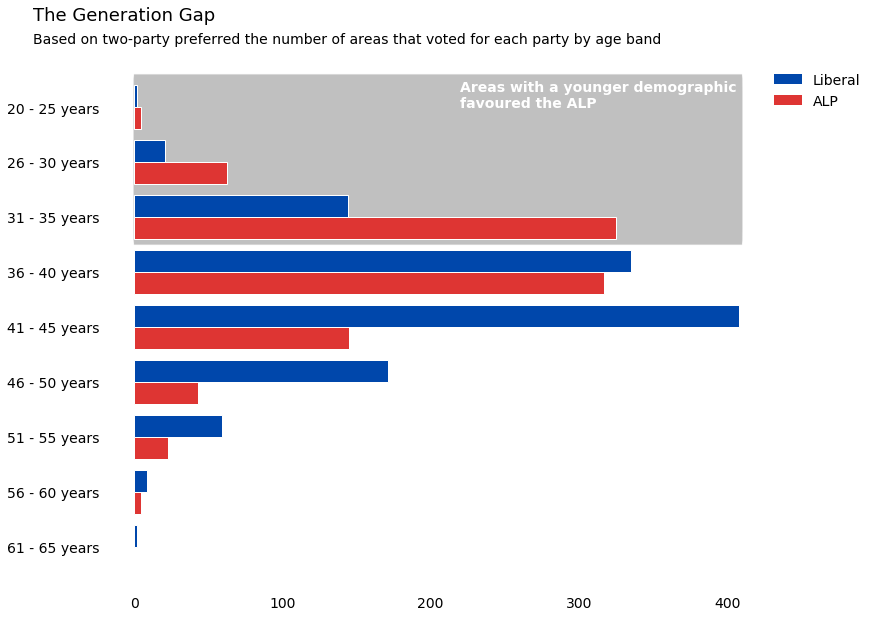

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,10))

# Set Default Values
lib_colour = "#0047AB"
alp_colour = "#DE3533"

# Set plot values
parties = pdf.loc[:,"Preferred Party"].unique()
age_bands = pdf.loc[:,"Age Bands"].unique()

n_age_bands = len(age_bands)
ind = np.arange(n_age_bands)
width = 0.4

axes.add_patch(pat.FancyBboxPatch((0,-2)
                                  ,width = 410
                                  ,height = 2.5
                                  ,alpha = 0.3
                                  ,edgecolor = "#D3D3D3"
                                  ,facecolor = "#303030"))

# Create Values
for party in parties:
    counts = pdf.loc[pdf["Preferred Party"] == party, "Count"].values
    if party == "Liberal":
        axes.barh(-ind + width, counts, width, color = lib_colour, edgecolor = "white")
    else:
        axes.barh(-ind, counts, width, color = alp_colour, edgecolor = "white")

axes.set_yticks(-ind + (width / 2))
axes.set_yticklabels(age_bands)

# Remove spines
axes.spines["top"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_visible(False)

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)

# Set title
axes.set_title("Based on two-party preferred the number of areas that voted for each party by age band"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (0.834,1))
fig.suptitle("The Generation Gap"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.255,0.94))

# Set Legend
legend_elements = [pat.Patch(facecolor = lib_colour, label = "Liberal"),
                  pat.Patch(facecolor = alp_colour, label = "ALP")]

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(handles = legend_elements, fontsize = 14, frameon = False, bbox_to_anchor = (1.15, 0.98))

# Add Text
axes.text(220, 0.2, "Areas with a younger demographic \nfavoured the ALP", c = "white", fontsize = 14, fontweight = "bold")

In [11]:
fig.savefig("age_bands_tpp.png", dpi = 300, bbox_inches = "tight")

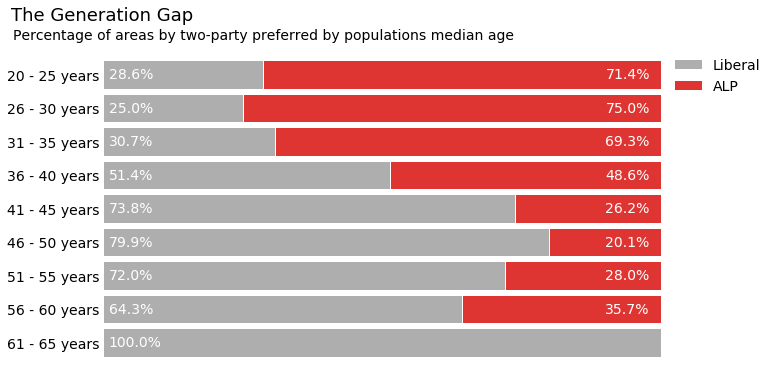

In [42]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
bar_height = 0.85
text_colour = "white"
lib_colour = "#aeaeae"
alp_colour = "#DE3533"

# Set plot values
parties = pdf.loc[:,"Preferred Party"].unique()
age_bands = np.sort(pdf.loc[:,"Age Bands"].unique())[::-1]

for age_band in age_bands:
    # Find the position of the state in the list
    position = [i for i,x in enumerate(age_bands) if x == age_band][0]
    
    # Calculate Lib/ALP TPP Percent
    total = sum(pdf.loc[pdf["Age Bands"] == age_band, "Count"])
    lib_pct = (pdf.loc[(pdf["Age Bands"] == age_band) & (pdf["Preferred Party"] == "Liberal"), "Count"] / total) * 100
    alp_pct = (pdf.loc[(pdf["Age Bands"] == age_band) & (pdf["Preferred Party"] == "ALP"), "Count"] / total) * 100
    
    # Create Horizontal Bar Chart
    axes.barh(age_band, lib_pct, color = lib_colour, edgecolor = "white", height = bar_height)
    axes.barh(age_band, alp_pct, left = lib_pct, color = alp_colour, edgecolor = "white", height = bar_height)
    
    # Add text to bars
    axes.text(1, position, s = str(round(lib_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    if alp_pct.values[0] > 0.0:
        axes.text(90, position, s = str(round(alp_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    
# Set title
axes.set_title("Percentage of areas by two-party preferred by populations median age"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (0.737,1))
fig.suptitle("The Generation Gap"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.25,0.97))

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["right"].set_position(('data', 100))
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("Liberal","ALP"),fontsize = 14, frameon = False, bbox_to_anchor = (1, 1))

In [35]:
fig.savefig("tpp_results_age.png", dpi = 300, bbox_inches = "tight")